In [2]:
pip install finterstellar

     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
import finterstellar as fs

In [ ]:
df = fs.fn_single(otp='16486231081001081001', symbol='LMT', window='T')

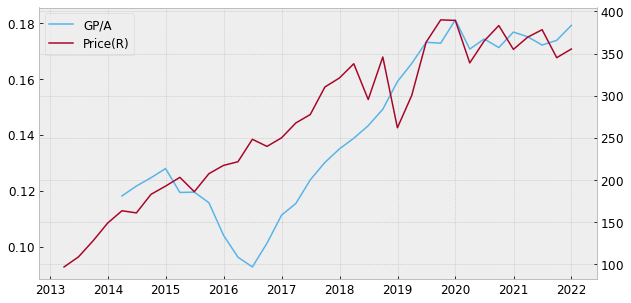

In [ ]:
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2
df['GP/A'] = df['Gross Profit'] / df['Avg Assets']
fs.draw_chart(df, left='GP/A', right='Price')

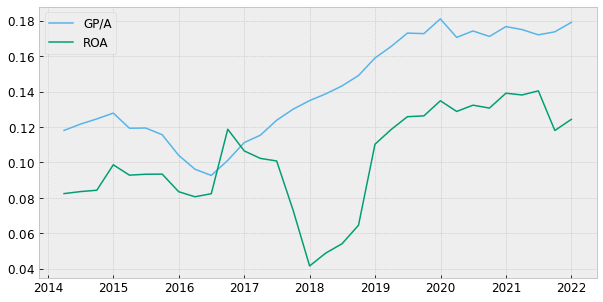

In [ ]:
df['ROA'] = df['Net Income'] / df['Avg Assets']
fs.draw_chart(df, left=['GP/A', 'ROA'])

In [ ]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486231081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')

In [ ]:
s = {}
signal = {}
for t in terms:
  s[t] = fs.fn_filter(data[t], by='GP/A', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

In [ ]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 14.13%
Accumulated return: 275.53%
Investment period: 10.0yrs
Sharpe ratio: 1.03
MDD: -38.17%


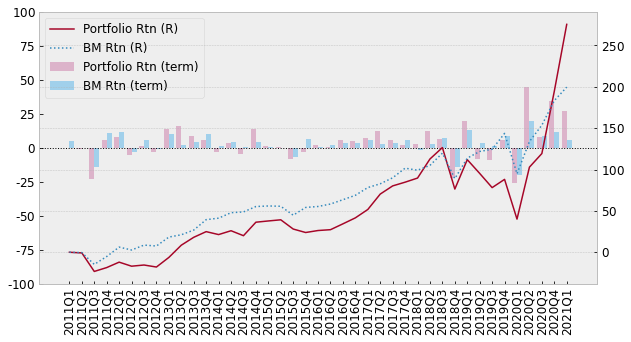

In [ ]:
fs.draw_return(df)

In [ ]:
# PER 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486231081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
s = {}
signal = {}

for t in terms:
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
  
  s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 6.40%
Accumulated return: 86.00%
Investment period: 10.0yrs
Sharpe ratio: 0.30
MDD: -52.72%


In [ ]:
# GP/A + PER 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486231081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 6.21%
Accumulated return: 82.75%
Investment period: 10.0yrs
Sharpe ratio: 0.28
MDD: -54.95%


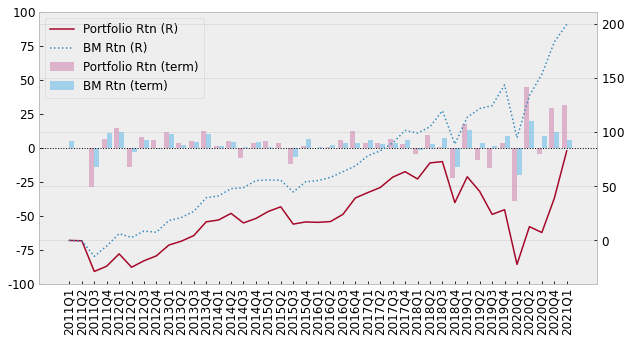

In [ ]:
s = {}
s1 = {}
s2 = {}
signal = {}

for t in terms:
  # GP/A
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')

  # PER
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']

  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, cap=10, asc=True)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# GP/A + PER 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 23.41%
Accumulated return: 720.54%
Investment period: 10.0yrs
Sharpe ratio: 1.67
MDD: -48.28%


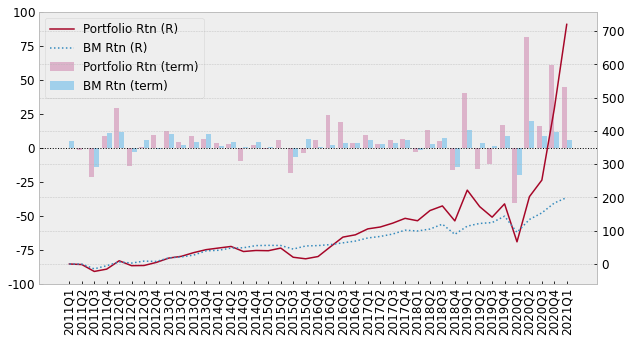

In [ ]:
s = {}
s1 = {}
s2 = {}
signal = {}

for t in terms:
  # GP/A
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')

  # PER
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])

  s1[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=0.1, cap=1, asc=True)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
df = fs.fn_single(otp='16487070301001081001', symbol='UBER', window='T')

In [ ]:
df['Liability/Equity'] = df['Total Liabilities'] / df['Shareholders Equity']
df['Debt/Equity'] = (df['Long Term Debt'] + df['Current Debt']) / df['Shareholders Equity']

In [ ]:
df[['Liability/Equity', 'Debt/Equity']].tail()

,Liability/Equity,Debt/Equity
2020-12-31,1.589597,0.845752
2021-03-31,1.513752,0.718047
2021-06-30,1.446702,0.688183
2021-09-30,1.622209,0.804321
2021-12-31,1.620210,0.802601


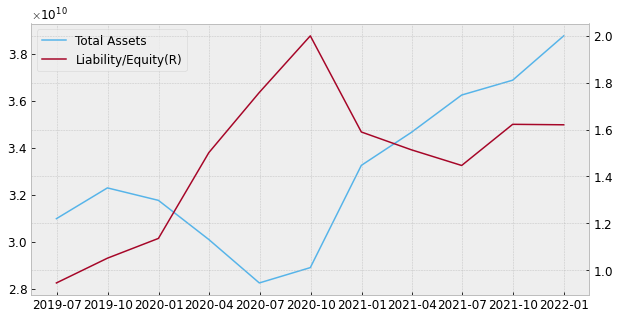

In [ ]:
fs.draw_chart(df, left='Total Assets', right='Liability/Equity')

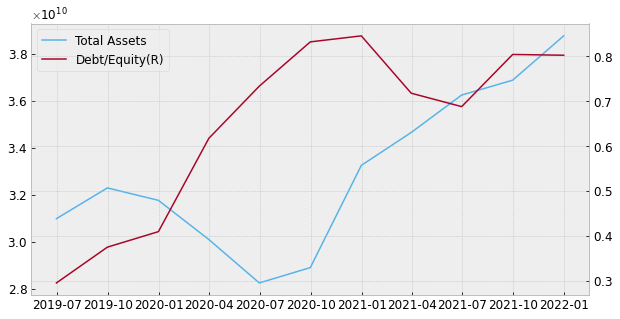

In [ ]:
fs.draw_chart(df, left='Total Assets', right='Debt/Equity')

In [ ]:
# Liability/Equity 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
s = {}
signal = {}

for t in terms:
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')

  s[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 4.93%
Accumulated return: 61.90%
Investment period: 10.0yrs
Sharpe ratio: 0.26
MDD: -32.60%


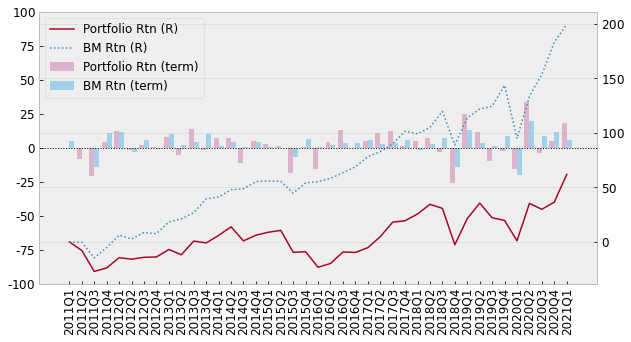

In [ ]:
fs.draw_return(df)

In [ ]:
# PER + Liability/Equity 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
s1 = {}
s2 = {}
s = {}
signal = {}

for t in terms:
  # PER
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']

  # Liability/Equity
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')

  s1[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, asc=True)
  s2[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=1000, asc=True)
  s[t] = fs.combine_signal(s1[t], s2[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 0.82%
Accumulated return: 8.52%
Investment period: 10.0yrs
Sharpe ratio: 0.03
MDD: -59.25%


In [ ]:
# PBR + Liability/Equity 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
s1 = {}
s2 = {}
s = {}
signal = {}

for t in terms:
  # PBR
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])

  # Liability/Equity
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')

  s1[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
  s2[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=1000, asc=True)
  s[t] = fs.combine_signal(s1[t], s2[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 20.03%
Accumulated return: 521.62%
Investment period: 10.0yrs
Sharpe ratio: 1.18
MDD: -46.77%


In [ ]:
df = fs.fn_single(otp='16487070301001081001', symbol='NFLX', window='T')

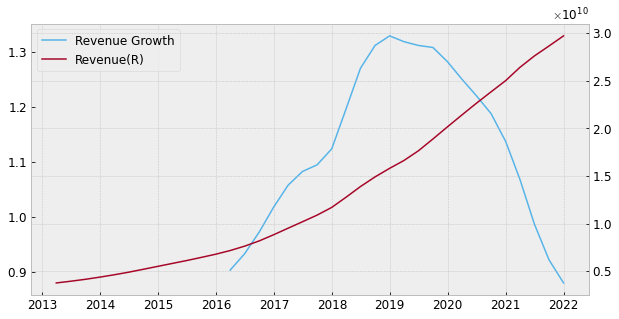

In [ ]:
# 매출액 증가율
df['Revenue Growth'] = (df['Revenue'] - df['Revenue'].shift(12)) / abs(df['Revenue'].shift(12))
fs.draw_chart(df, left='Revenue Growth', right='Revenue')

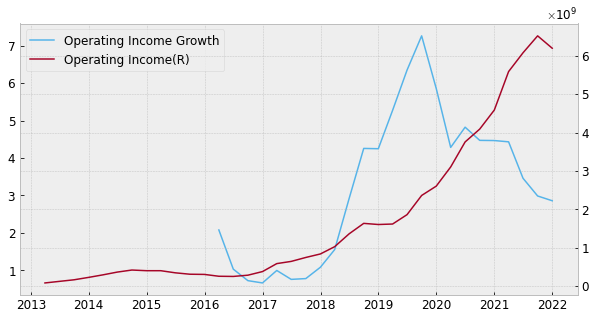

In [ ]:
# 영업이익 증가율
df['Operating Income Growth'] = (df['Operating Income'] - df['Operating Income'].shift(12)) / abs(df['Operating Income'].shift(12))
fs.draw_chart(df, left='Operating Income Growth', right='Operating Income')

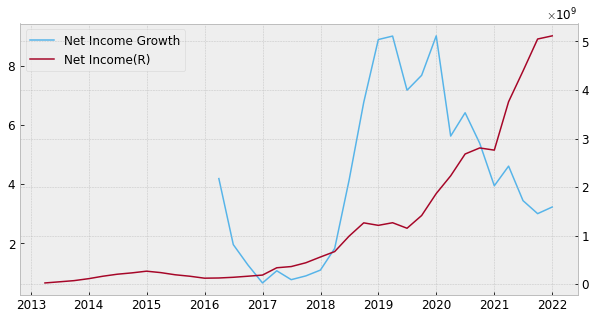

In [ ]:
# 순이익 증가율
df['Net Income Growth'] = (df['Net Income'] - df['Net Income'].shift(12)) / abs(df['Net Income'].shift(12))
fs.draw_chart(df, left='Net Income Growth', right='Net Income')

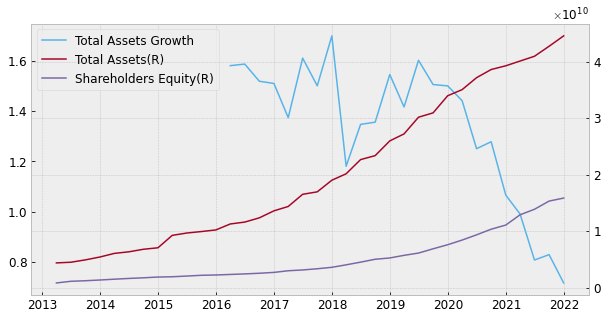

In [ ]:
# 자산 성장률
df['Total Assets Growth'] = (df['Total Assets'] - df['Total Assets'].shift(12)) / abs(df['Total Assets'].shift(12))
fs.draw_chart(df, left='Total Assets Growth', right=['Total Assets', 'Shareholders Equity'])

In [ ]:
# 매출액 증가율
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 16.72%
Accumulated return: 195.38%
Investment period: 7.0yrs
Sharpe ratio: 0.82
MDD: -30.30%


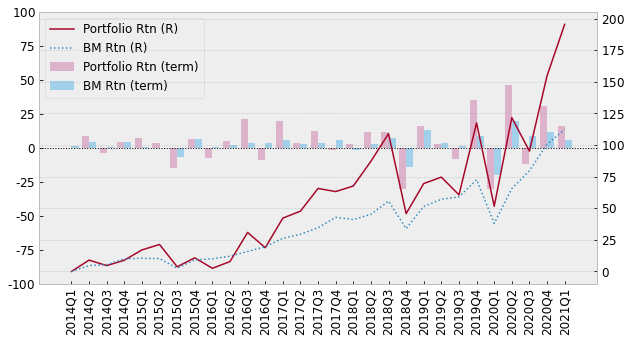

In [ ]:
s = {}
signal = {}
y = 3 # 3년

for t in terms:
  if list(terms).index(t) >= y * 4:
    prev_t = fs.quarters_before(terms, t, y * 4) # 3년 * 4분기 = 12분기
    data[t]['Revenue Growth'] = (data[t]['Revenue'] - data[prev_t]['Revenue']) / abs(data[prev_t]['Revenue'])

    s[t] = fs.fn_filter(data[t], by='Revenue Growth', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# 영업이익 증가율
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 7.58%
Accumulated return: 66.85%
Investment period: 7.0yrs
Sharpe ratio: 0.35
MDD: -47.25%


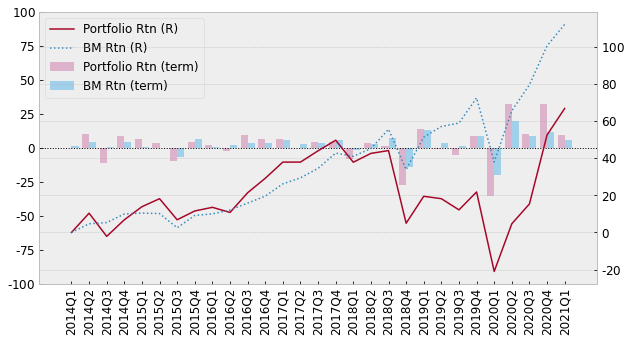

In [ ]:
s = {}
signal = {}
y = 3 # 3년

for t in terms:
  if list(terms).index(t) >= y * 4:
    prev_t = fs.quarters_before(terms, t, y * 4) # 3년 * 4분기 = 12분기
    data[t]['Operating Income Growth'] = (data[t]['Operating Income'] - data[prev_t]['Operating Income']) / abs(data[prev_t]['Operating Income'])

    s[t] = fs.fn_filter(data[t], by='Operating Income Growth', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# 순이익 증가율
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 4.12%
Accumulated return: 32.68%
Investment period: 7.0yrs
Sharpe ratio: 0.21
MDD: -32.60%


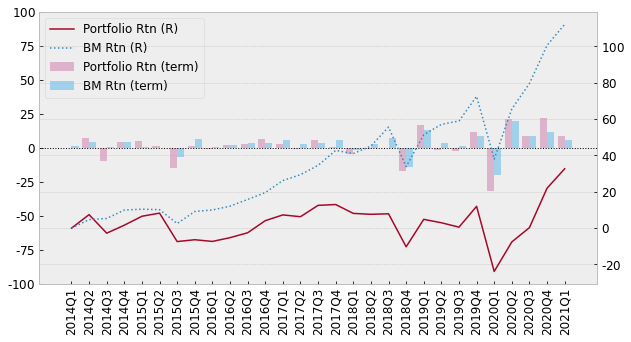

In [ ]:
s = {}
signal = {}
y = 3 # 3년

for t in terms:
  if list(terms).index(t) >= y * 4:
    prev_t = fs.quarters_before(terms, t, y * 4) # 3년 * 4분기 = 12분기
    data[t]['Net Income Growth'] = (data[t]['Net Income'] - data[prev_t]['Net Income']) / abs(data[prev_t]['Net Income'])

    s[t] = fs.fn_filter(data[t], by='Net Income Growth', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# PER + 순이익 증가율
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 6.04%
Accumulated return: 50.79%
Investment period: 7.0yrs
Sharpe ratio: 0.23
MDD: -55.42%


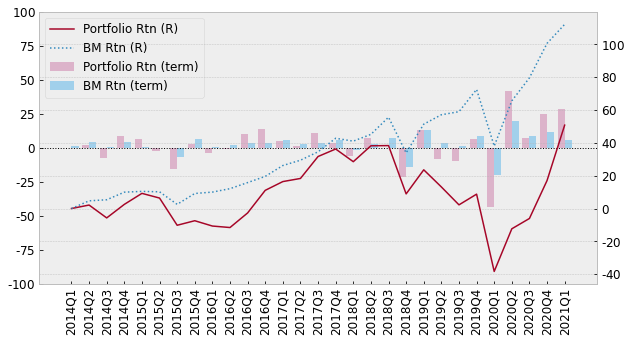

In [ ]:
s1 = {}
s2 = {}
s = {}
signal = {}
y = 3 # 3년

for t in terms:
  if list(terms).index(t) >= y * 4:
    prev_t = fs.quarters_before(terms, t, y * 4) # 3년 * 4분기 = 12분기
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
    data[t]['Net Income Growth'] = (data[t]['Net Income'] - data[prev_t]['Net Income']) / abs(data[prev_t]['Net Income'])

    s1[t] = fs.fn_score(data[t], by='PER', floor=1, cap=10, asc=True)
    s2[t] = fs.fn_score(data[t], by='Net Income Growth', floor=0, asc=False)
    s[t] = fs.combine_score(s1[t], s2[t], n=30)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# PBR + 영업이익 증가율
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 8.36%
Accumulated return: 75.49%
Investment period: 7.0yrs
Sharpe ratio: 0.28
MDD: -56.19%


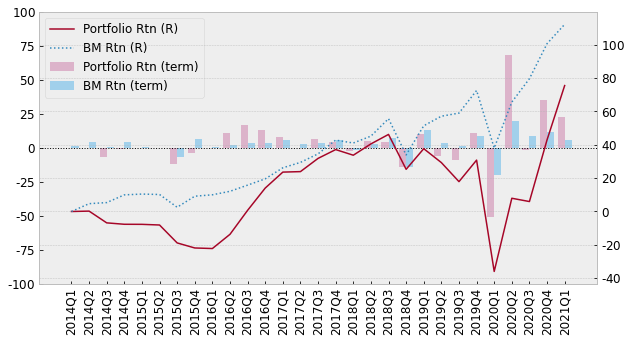

In [ ]:
s1 = {}
s2 = {}
s = {}
signal = {}
y = 3 # 3년

for t in terms:
  if list(terms).index(t) >= y * 4:
    prev_t = fs.quarters_before(terms, t, y * 4) # 3년 * 4분기 = 12분기
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
    data[t]['Operating Income Growth'] = (data[t]['Operating Income'] - data[prev_t]['Operating Income']) / abs(data[prev_t]['Operating Income'])

    s1[t] = fs.fn_score(data[t], by='PBR', floor=.1, cap=1, asc=True)
    s2[t] = fs.fn_score(data[t], by='Operating Income Growth', floor=0, asc=False)
    s[t] = fs.combine_score(s1[t], s2[t], n=30)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
df = fs.fn_single(otp='16487070301001081001', symbol='F', window='T')

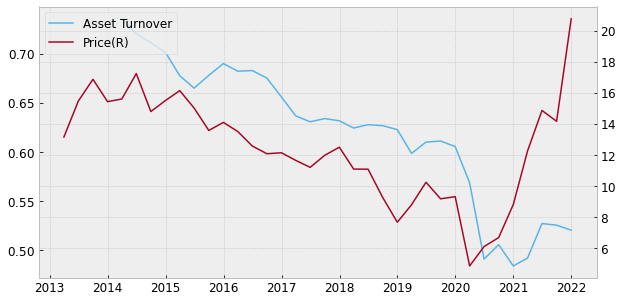

In [ ]:
# 총자산 회전율
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2
df['Asset Turnover'] = df['Revenue'] / df['Avg Assets']
fs.draw_chart(df, left='Asset Turnover', right='Price')

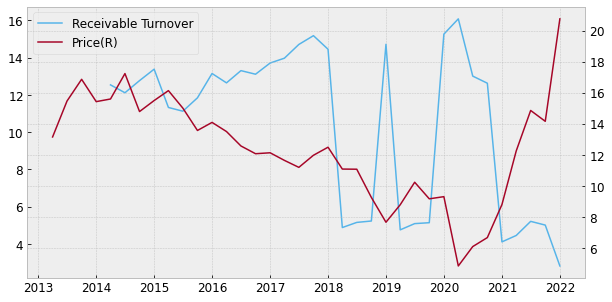

In [ ]:
# 매출채권 회전율
df['Avg Receivables'] = (df['Receivables'] + df['Receivables'].shift(4)) / 2
df['Receivable Turnover'] = df['Revenue'] / df['Avg Receivables']
fs.draw_chart(df, left='Receivable Turnover', right='Price')

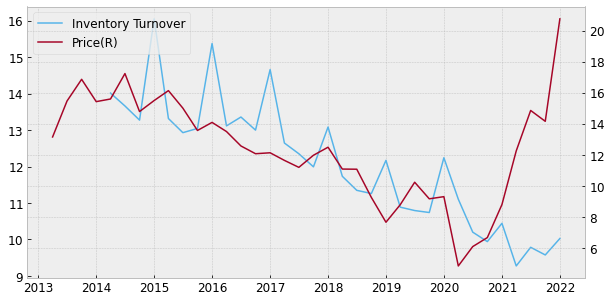

In [ ]:
# 재고자산 회전율
df['Avg Inventory'] = (df['Inventory'] + df['Inventory'].shift(4)) / 2
df['Inventory Turnover'] = df['COGS'] / df['Avg Inventory']
fs.draw_chart(df, left='Inventory Turnover', right='Price')

In [ ]:
# 총자산 회전율
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 12.68%
Accumulated return: 230.18%
Investment period: 10.0yrs
Sharpe ratio: 0.92
MDD: -25.88%


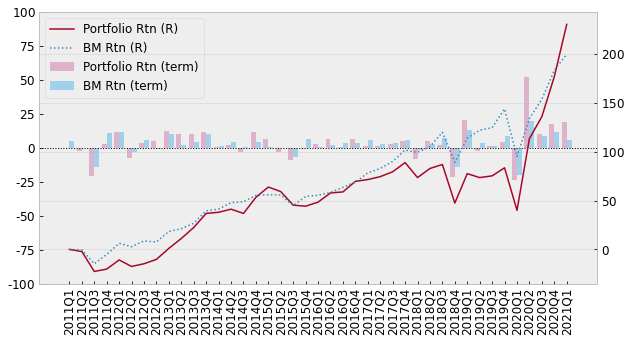

In [ ]:
s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['Assets Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']

  s[t] = fs.fn_filter(data[t], by='Assets Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# GP/E
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 12.84%
Accumulated return: 234.94%
Investment period: 10.0yrs
Sharpe ratio: 1.01
MDD: -31.68%


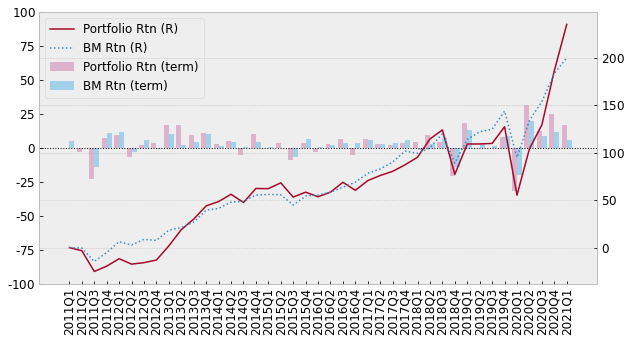

In [ ]:
s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2
  data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'GP/E'] = float('nan')

  s[t] = fs.fn_filter(data[t], by='GP/E', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# S/E, Equity Turnover
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487070301001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 17.61%
Accumulated return: 406.82%
Investment period: 10.0yrs
Sharpe ratio: 1.52
MDD: -32.48%


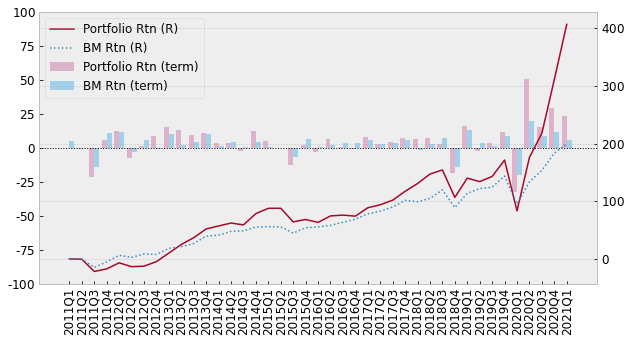

In [ ]:
s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2
  data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity']

  s[t] = fs.fn_filter(data[t], by='Equity Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# Receivable Turnover
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16491455081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 15.55%
Accumulated return: 324.96%
Investment period: 10.0yrs
Sharpe ratio: 1.31
MDD: -23.56%


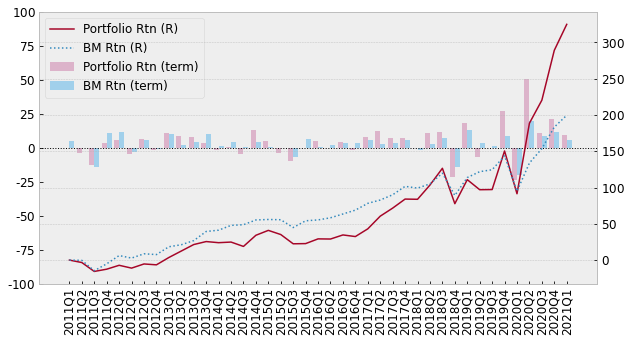

In [ ]:
s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Receivables'] = (data[t]['Receivables'] + data[prev_t]['Receivables']) / 2
  data[t]['Receivables Turnover'] = data[t]['Revenue'] / data[t]['Avg Receivables']

  s[t] = fs.fn_filter(data[t], by='Receivables Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# Inventory Turnover
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16491455081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 16.15%
Accumulated return: 347.34%
Investment period: 10.0yrs
Sharpe ratio: 1.44
MDD: -31.75%


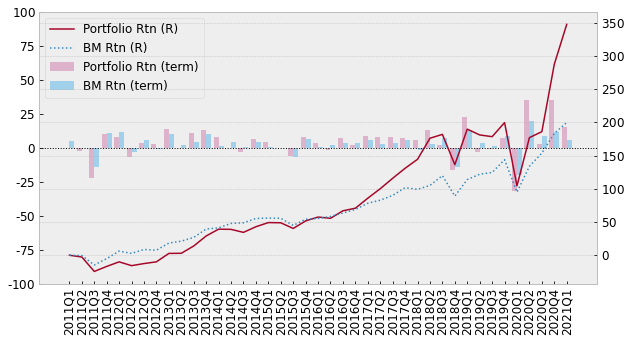

In [ ]:
s = {}
signal = {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Inventory'] = (data[t]['Inventory'] + data[prev_t]['Inventory']) / 2
  data[t]['Inventory Turnover'] = data[t]['COGS'] / data[t]['Avg Inventory']

  s[t] = fs.fn_filter(data[t], by='Inventory Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

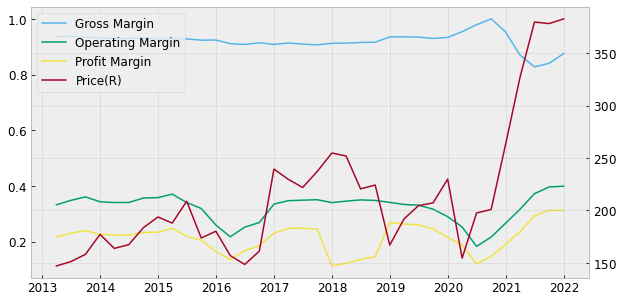

In [ ]:
df = fs.fn_single(otp='16491455081001081001', symbol='GS', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue'] # 영업이익률
df['Profit Margin'] = df['Net Income'] / df['Revenue'] # 순이익률
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

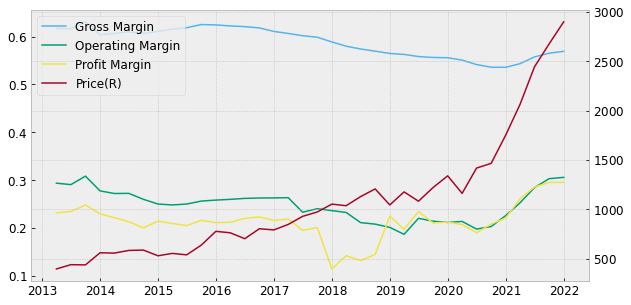

In [ ]:
df = fs.fn_single(otp='16491455081001081001', symbol='GOOGL', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue']
df['Profit Margin'] = df['Net Income'] / df['Revenue']
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

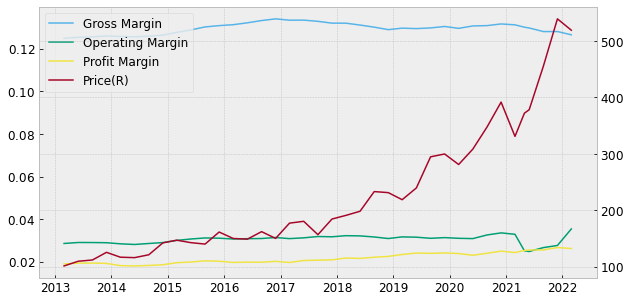

In [ ]:
df = fs.fn_single(otp='16491455081001081001', symbol='COST', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue']
df['Profit Margin'] = df['Net Income'] / df['Revenue']
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

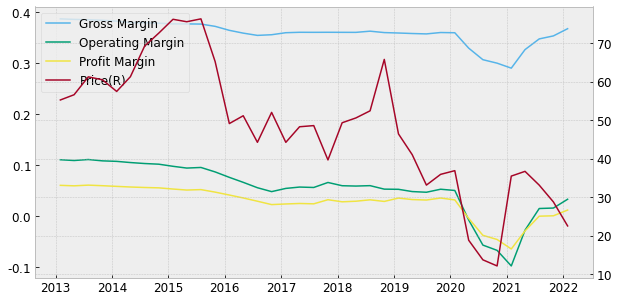

In [ ]:
df = fs.fn_single(otp='16491455081001081001', symbol='JWN', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue']
df['Profit Margin'] = df['Net Income'] / df['Revenue']
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

In [ ]:
# Gross Margin
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16491455081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 15.67%
Accumulated return: 329.41%
Investment period: 10.0yrs
Sharpe ratio: 1.14
MDD: -25.37%


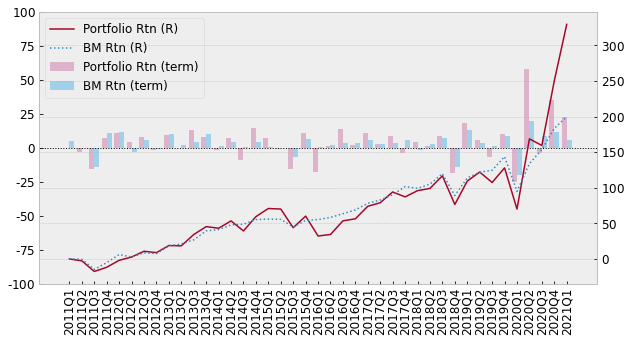

In [ ]:
s = {}
signal = {}

for t in terms:
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']

  s[t] = fs.fn_filter(data[t], by='Gross Margin', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
sector_info = fs.sector_info(data['2020Q3'])
sector_info

sector
Basic Materials           [Aluminum, Gold, Silver, Specialty Chemicals, ...
Communication Services    [Entertainment, Broadcasting, Telecom Services...
Consumer Cyclical         [Specialty Retail, Auto & Truck Dealerships, G...
Consumer Defensive        [Beverages Brewers, Farm Products, Education &...
Energy                    [Oil & Gas Midstream, Oil & Gas E&P, Oil & Gas...
Financial Services        [Banks Regional, Insurance Diversified, Credit...
Healthcare                [Diagnostics & Research, Biotechnology, Drug M...
Industrials               [Airlines, Building Products & Equipment, Airp...
Other                                                               [Other]
Real Estate               [Reit Mortgage, Reit Diversified, Reit Residen...
Technology                [Semiconductors, Consumer Electronics, Softwar...
Utilities                 [Utilities Regulated Electric, Utilities Diver...
Name: industry, dtype: object

In [ ]:
fs.sector_filter(df=data['2020Q4'], sector=['Technology'])

,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,...,Price,Price_M1,Price_M2,Price_M3,name,name_kr,sector,industry,avg_volume,Gross Margin
symbol,,,,,,,,,,,,,,,,,,,,,
AAOI,2020Q4,234.62,184.18,50.44,55.89,-48.84,-58.45,-2.71,-23.44,-48.84,...,8.51,11.01,9.32,8.36,Applied Optoelectronics Inc,어플라이드 옵토일렉트로닉스,Technology,Semiconductors,682067,0.21
AAPL,2020Q4,"294,239.00","179,823.00","114,416.00","20,350.00","74,253.00","63,930.00",3.72,"85,508.00","74,253.00",...,132.69,131.96,121.26,122.15,Apple Inc,애플,Technology,Consumer Electronics,186217000,0.39
ACIW,2020Q4,"1,294.32",655.32,639.00,256.04,144.74,72.66,0.61,312.12,144.74,...,38.43,38.39,38.26,38.05,ACI Worldwide Inc,ACI 월드와이드,Technology,Software Infrastructure,680867,0.49
ACLS,2020Q4,474.56,275.98,198.58,78.71,58.04,49.98,1.49,67.98,58.04,...,29.12,34.24,36.87,41.09,Axcelis Technologies Inc,액셀리스 테크놀로지스,Technology,Semiconductor Equipment & Materials,317933,0.42
ACMR,2020Q4,156.62,87.03,69.60,28.99,21.49,18.78,0.95,22.55,21.49,...,27.08,30.00,32.39,26.93,ACM Research Inc Class A,ACM 리서치 Class A,Technology,Semiconductor Equipment & Materials,851700,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPP,2020Q4,985.96,781.72,204.24,95.09,26.70,35.06,0.54,26.70,26.70,...,11.85,13.71,16.53,10.77,Zepp Health Corp ADR Class A,젭 헬스 ADR Class A,Technology,Scientific & Technical Instruments,280800,0.21
ZI,2020Q4,476.20,95.50,380.70,245.90,37.10,-9.90,-0.07,113.20,37.10,...,48.23,48.01,52.42,48.90,ZoomInfo Technologies Inc Class A,줌인포 테크놀로지,Technology,Software Application,2944470,0.80
ZM,2020Q4,"1,957.13",587.25,"1,369.88",823.22,414.28,425.04,1.52,520.99,414.28,...,337.32,372.07,373.61,321.29,Zoom Video Communications Inc Class A,줌 비디오 커뮤니케이션 Class A,Technology,Software Application,13712300,0.70


In [ ]:
# Gross Margin
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16491455081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 15.67%
Accumulated return: 329.41%
Investment period: 10.0yrs
Sharpe ratio: 1.14
MDD: -25.37%


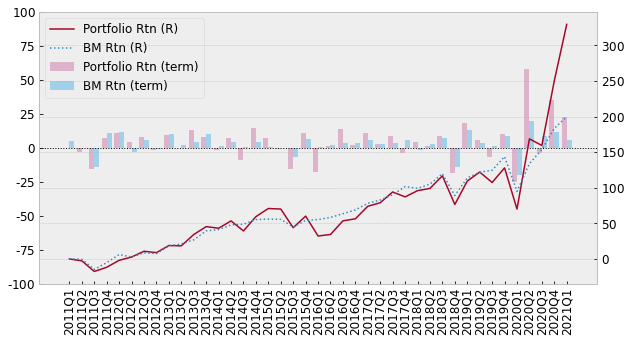

In [ ]:
s = {}
signal = {}

for t in terms:
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']

  s[t] = fs.sector_filter(df=data[t], sector=['Technology']) # 분기별 "Technology" 산업군 추출
  s[t] = fs.fn_filter(data[t], by='Gross Margin', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

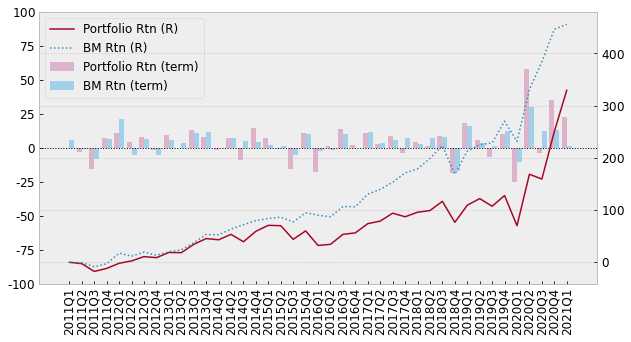

In [ ]:
fs.draw_return(df, bm='QQQ') # 대부분이 기술주인 ETF

In [ ]:
# Operating Margin
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16491455081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: -1.06%
Accumulated return: -10.07%
Investment period: 10.0yrs
Sharpe ratio: -0.05
MDD: -51.52%


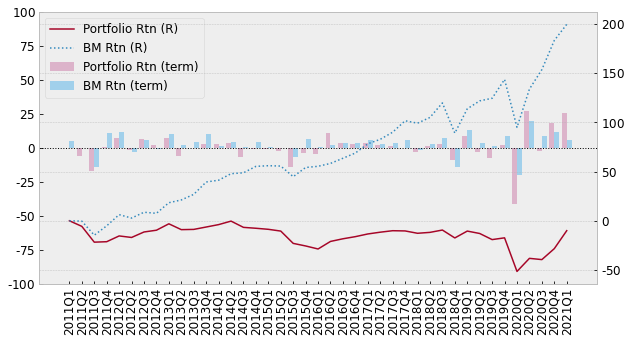

In [ ]:
s = {}
signal = {}

for t in terms:
  data[t]['Operating Margin'] = data[t]['Operating Income'] / data[t]['Revenue'] * 100

  s[t] = fs.sector_filter(df=data[t], sector=['Technology']) # 분기별 "Technology" 산업군 추출
  s[t] = fs.fn_filter(data[t], by='Operating Margin', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
df = fs.fn_single(otp='16491455081001081001', symbol='TSLA', window='T')

In [ ]:
df.columns

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

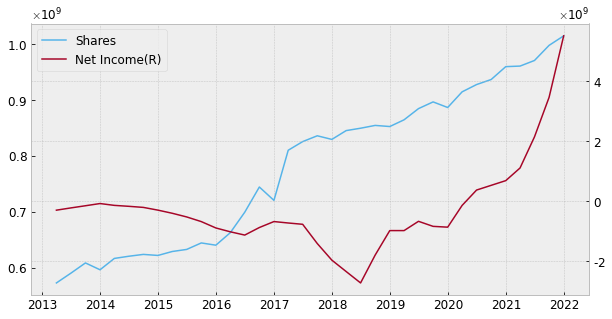

In [ ]:
fs.draw_chart(df, left='Shares', right='Net Income')

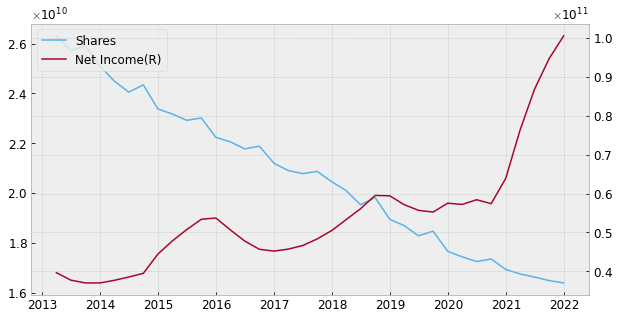

In [ ]:
df = fs.fn_single(otp='16491455081001081001', symbol='AAPL', window='T')
fs.draw_chart(df, left='Shares', right='Net Income')

In [4]:
df = fs.fn_single(otp='16491455081001081001', symbol='KO', window='T')

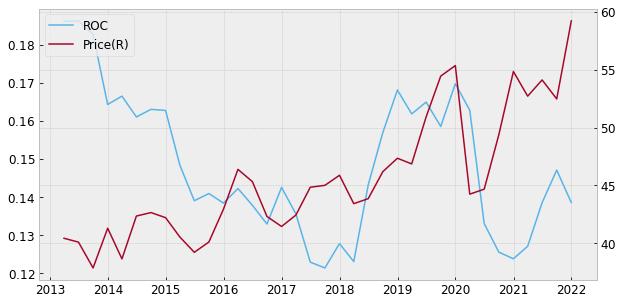

In [5]:
df['ROC'] = df['EBIT'] / (df['Total Assets'] - df['Current Liabilities'])
fs.draw_chart(df, left='ROC', right='Price')

In [6]:
# Magic Formular
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16491455081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 4.18%
Accumulated return: 50.71%
Investment period: 10.0yrs
Sharpe ratio: 0.17
MDD: -53.55%


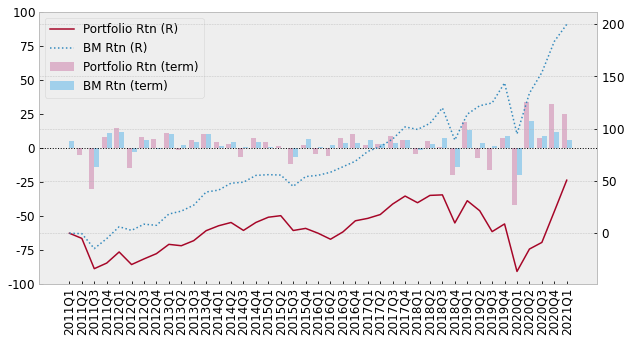

In [7]:
s1 = {}
s2 = {}
s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # PER의 역수 = 이익 수익률(Earnings Yield)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2 # 평균 자산
  data[t]['Avg Current Liabilities'] = (data[t]['Current Liabilities'] + data[prev_t]['Current Liabilities']) / 2 # 현재 평균 부채
  data[t]['ROC'] = data[t]['EBIT'] / (data[t]['Avg Assets'] - data[t]['Avg Current Liabilities']) # EBIT / 투입자본(= 자산 - 부채)

  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, cap=10, asc=True) # PER 하위권 = 높은 이익 수익률
  s2[t] = fs.fn_score(data[t], by='ROC', method='relative', floor=0, asc=False) # ROC 상위권 = 높은 자본수익률
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001, rf_rate=.01)
fs.draw_return(df)

In [8]:
# PBR + GP/A
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16491455081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 20.60%
Accumulated return: 551.86%
Investment period: 10.0yrs
Sharpe ratio: 1.42
MDD: -46.00%


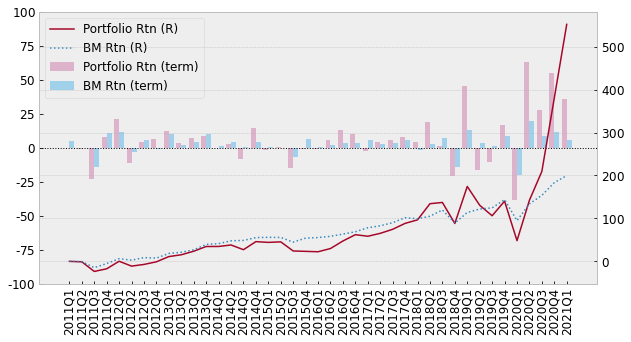

In [9]:
s1 = {}
s2 = {}
s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # 주가순자산 비율
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2 # 총 자산
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # 매출 총이익 / 총 자산

  s1[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, cap=2, asc=True) # PBR 하위권 (마법 공식에는 하위권 사용)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False) # GA/A 상위권
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001, rf_rate=.01)
fs.draw_return(df)

In [10]:
df = fs.fn_single(otp='16491455081001081001', symbol='FB', window='T')

In [11]:
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2
df['ROA'] = df['Net Income'] / df['Avg Assets']
df['Current Ratio'] = df['Current Assets'] / df['Current Liabilities']
df['Debt/Asset'] = df['Long Term Debt'] / df['Total Assets']
df['Gross Margin'] = df['Gross Profit'] / df['Revenue']
df['Asset Turnover'] = df['Revenue'] / df['Avg Assets']

In [12]:
df['F_ROA'] = 0 # 순이익 흑자 달성
df['F_ROA_dt'] = 0 # 순이익 증가
df['F_CFO'] = 0 # 영업현금흐름 흑자 달성
df['F_Accrual'] = 0 # 수익조작 여부
df['F_Liquid'] = 0 # 유동성 개선
df['F_Lever'] = 0 # 부채 개선
df['F_Shares'] = 0 # 주식수 증가 여부
df['F_Margin'] = 0 # 매출총이익률 개선
df['F_Turn'] = 0 # 자산회전율 개선

df['F_Score'] = 0 # 총점

In [13]:
df.loc[df['ROA'] > 0, 'F_ROA'] = 1 # 순이익 흑자 달성
df.loc[df['ROA'] > df['ROA'].shift(4), 'F_ROA_dt'] = 1 # 순이익 증가
df.loc[df['Operating Cash Flow'] > 0, 'F_CFO'] = 1 # 영업현금흐름 흑자 달성
df.loc[df['Operating Cash Flow'] - df['Net Income'] > 0, 'F_Accrual'] = 1 # 수익조작 여부
df.loc[df['Current Ratio'] - df['Current Ratio'].shift(4) < 0, 'F_Liquid'] = 1 # 유동성 개선
df.loc[df['Debt/Asset'] - df['Debt/Asset'].shift(4) < 0, 'F_Lever'] = 1 # 부채 개선
df.loc[df['Shares'] - df['Shares'].shift(4) <= 0, 'F_Shares'] = 1 # 주식 수 증가 여부
df.loc[df['Gross Margin'] - df['Gross Margin'].shift(4) > 0, 'F_Margin'] = 1 # 매출총이익률 개선
df.loc[df['Asset Turnover'] - df['Asset Turnover'].shift(4) > 0, 'F_Turn'] = 1 # 자산회전율 개선

df['F_Score'] = (df['F_ROA'] + df['F_ROA_dt'] + df['F_CFO'] + df['F_Accrual'] +
                 df['F_Liquid'] + df['F_Lever'] + df['F_Shares'] + df['F_Margin'] + df['F_Turn']) # 총점

In [14]:
df[['F_Score', 'F_ROA', 'F_ROA_dt', 'F_CFO', 'F_Accrual', 'F_Liquid', 'F_Lever', 'F_Shares', 'F_Margin', 'F_Turn']].tail()

,F_Score,F_ROA,F_ROA_dt,F_CFO,F_Accrual,F_Liquid,F_Lever,F_Shares,F_Margin,F_Turn
2020-12-31,6,1,1,1,1,0,1,1,0,0
2021-03-31,7,1,1,1,1,0,1,1,0,1
2021-06-30,8,1,1,1,1,1,1,1,0,1
2021-09-30,7,1,1,1,1,1,0,1,0,1
2021-12-31,8,1,1,1,1,1,0,1,1,1


In [15]:
# Piotroski 준비작업
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16491455081001081001', term=t, vol=0)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [19]:
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4) # 과거 비교대상 : 4분기 이전

  # F-Score 계산을 위한 팩터 생성
  data[t]['Market Cap'] = data[t]['Price_M3'] + data[t]['Shares']
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[t]['Total Assets'].shift(4)) / 2
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
  data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities']
  data[t]['Debt/Asset'] = data[t]['Long Term Debt'] / data[t]['Total Assets']
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']
  data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']

  # F-Score 지표 초기화
  data[t]['F_ROA'] = 0 # 순이익 흑자 달성
  data[t]['F_ROA_dt'] = 0 # 순이익 증가
  data[t]['F_CFO'] = 0 # 영업현금흐름 흑자 달성
  data[t]['F_Accrual'] = 0 # 수익조작 여부
  data[t]['F_Liquid'] = 0 # 유동성 개선
  data[t]['F_Lever'] = 0 # 부채 개선
  data[t]['F_Shares'] = 0 # 주식수 증가 여부
  data[t]['F_Margin'] = 0 # 매출총이익률 개선
  data[t]['F_Turn'] = 0 # 자산회전율 개선

  data[t]['F_Score'] = 0 # 총점

  # F-Score 지표 계산
  data[t].loc[data[t]['ROA'] > 0, 'F_ROA'] = 1 # 순이익 흑자 달성
  data[t].loc[data[t]['ROA'] > data[t]['ROA'].shift(4), 'F_ROA_dt'] = 1 # 순이익 증가
  data[t].loc[data[t]['Operating Cash Flow'] > 0, 'F_CFO'] = 1 # 영업현금흐름 흑자 달성
  data[t].loc[data[t]['Operating Cash Flow'] - data[t]['Net Income'] > 0, 'F_Accrual'] = 1 # 수익조작 여부
  data[t].loc[data[t]['Current Ratio'] - data[t]['Current Ratio'].shift(4) < 0, 'F_Liquid'] = 1 # 유동성 개선
  data[t].loc[data[t]['Debt/Asset'] - data[t]['Debt/Asset'].shift(4) < 0, 'F_Lever'] = 1 # 부채 개선
  data[t].loc[data[t]['Shares'] - data[t]['Shares'].shift(4) <= 0, 'F_Shares'] = 1 # 주식 수 증가 여부
  data[t].loc[data[t]['Gross Margin'] - data[t]['Gross Margin'].shift(4) > 0, 'F_Margin'] = 1 # 매출총이익률 개선
  data[t].loc[data[t]['Asset Turnover'] - data[t]['Asset Turnover'].shift(4) > 0, 'F_Turn'] = 1 # 자산회전율 개선

  data[t]['F_Score'] = (data[t]['F_ROA'] + data[t]['F_ROA_dt'] + data[t]['F_CFO'] + data[t]['F_Accrual'] +
                  data[t]['F_Liquid'] + data[t]['F_Lever'] + data[t]['F_Shares'] + data[t]['F_Margin'] + data[t]['F_Turn']) # 총점

CAGR: 11.14%
Accumulated return: 187.70%
Investment period: 10.0yrs
Sharpe ratio: 0.87
MDD: -38.72%


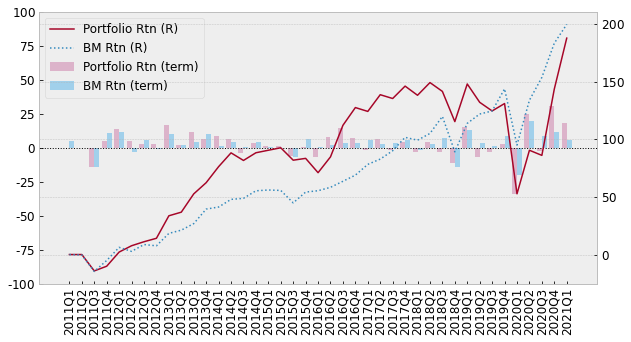

In [20]:
# High F-Score
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}

for t in terms:
  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s2[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
  s3[t] = fs.fn_filter(data[t], by='F_Score', floor=7, cap=9, asc=False)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t]).sample(frac=1)[:30]
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [21]:
import pandas as pd

data = {
    'Name' : ['Microsoft Corporation', 'Google, LLC', 'Tesla, Inc.', 'Apple Inc.', 'Netflix, Inc'],
    'Symbol' : ['MSFT', 'GOOG', 'TSLA', 'AAPL', 'NFLX'],
    'Shares' : [100, 50, 150, 200, 80]
}

df = pd.DataFrame(data)
df

,Name,Symbol,Shares
0,Microsoft Corporation,MSFT,100
1,"Google, LLC",GOOG,50
2,"Tesla, Inc.",TSLA,150
3,Apple Inc.,AAPL,200
4,"Netflix, Inc",NFLX,80


In [22]:
df_sub = df.sample(frac=0.67)
print(df_sub)

                    Name Symbol  Shares
2            Tesla, Inc.   TSLA     150
0  Microsoft Corporation   MSFT     100
1            Google, LLC   GOOG      50


In [23]:
df_sub = df.sample(frac=1)
print(df_sub)

                    Name Symbol  Shares
3             Apple Inc.   AAPL     200
0  Microsoft Corporation   MSFT     100
4           Netflix, Inc   NFLX      80
1            Google, LLC   GOOG      50
2            Tesla, Inc.   TSLA     150


In [26]:
# Piotroski 준비작업
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16491455081001081001', term=t, vol=0)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [27]:
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4) # 과거 비교대상 : 4분기 이전

  # F-Score 계산을 위한 팩터 생성
  data[t]['Market Cap'] = data[t]['Price_M3'] + data[t]['Shares']
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[t]['Total Assets'].shift(4)) / 2
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
  data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities']
  data[t]['Debt/Asset'] = data[t]['Long Term Debt'] / data[t]['Total Assets']
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']
  data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']

  # F-Score 지표 초기화
  data[t]['F_ROA'] = 0 # 순이익 흑자 달성
  data[t]['F_ROA_dt'] = 0 # 순이익 증가
  data[t]['F_CFO'] = 0 # 영업현금흐름 흑자 달성
  data[t]['F_Accrual'] = 0 # 수익조작 여부
  data[t]['F_Liquid'] = 0 # 유동성 개선
  data[t]['F_Lever'] = 0 # 부채 개선
  data[t]['F_Shares'] = 0 # 주식수 증가 여부
  data[t]['F_Margin'] = 0 # 매출총이익률 개선
  data[t]['F_Turn'] = 0 # 자산회전율 개선

  data[t]['F_Score'] = 0 # 총점

  # F-Score 지표 계산
  data[t].loc[data[t]['ROA'] > 0, 'F_ROA'] = 1 # 순이익 흑자 달성
  data[t].loc[data[t]['ROA'] > data[t]['ROA'].shift(4), 'F_ROA_dt'] = 1 # 순이익 증가
  data[t].loc[data[t]['Operating Cash Flow'] > 0, 'F_CFO'] = 1 # 영업현금흐름 흑자 달성
  data[t].loc[data[t]['Operating Cash Flow'] - data[t]['Net Income'] > 0, 'F_Accrual'] = 1 # 수익조작 여부
  data[t].loc[data[t]['Current Ratio'] - data[t]['Current Ratio'].shift(4) < 0, 'F_Liquid'] = 1 # 유동성 개선
  data[t].loc[data[t]['Debt/Asset'] - data[t]['Debt/Asset'].shift(4) < 0, 'F_Lever'] = 1 # 부채 개선
  data[t].loc[data[t]['Shares'] - data[t]['Shares'].shift(4) <= 0, 'F_Shares'] = 1 # 주식 수 증가 여부
  data[t].loc[data[t]['Gross Margin'] - data[t]['Gross Margin'].shift(4) > 0, 'F_Margin'] = 1 # 매출총이익률 개선
  data[t].loc[data[t]['Asset Turnover'] - data[t]['Asset Turnover'].shift(4) > 0, 'F_Turn'] = 1 # 자산회전율 개선

  data[t]['F_Score'] = (data[t]['F_ROA'] + data[t]['F_ROA_dt'] + data[t]['F_CFO'] + data[t]['F_Accrual'] +
                  data[t]['F_Liquid'] + data[t]['F_Lever'] + data[t]['F_Shares'] + data[t]['F_Margin'] + data[t]['F_Turn']) # 총점

CAGR: 28.08%
Accumulated return: 1090.27%
Investment period: 10.0yrs
Sharpe ratio: 2.81
MDD: -36.48%


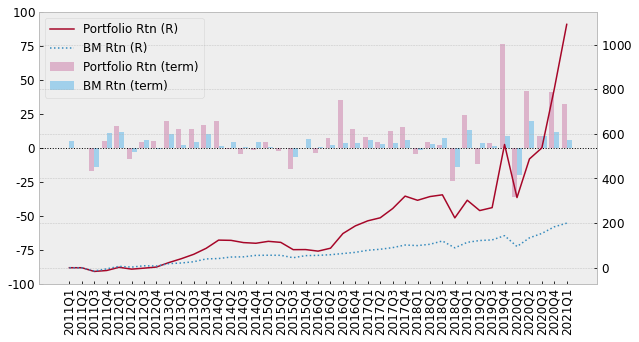

In [28]:
# Mid F-Score
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}

for t in terms:
  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s2[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
  s3[t] = fs.fn_filter(data[t], by='F_Score', floor=4, cap=6, asc=False)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t]).sample(frac=1)[:30]
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 22.42%
Accumulated return: 657.51%
Investment period: 10.0yrs
Sharpe ratio: 2.26
MDD: -35.16%


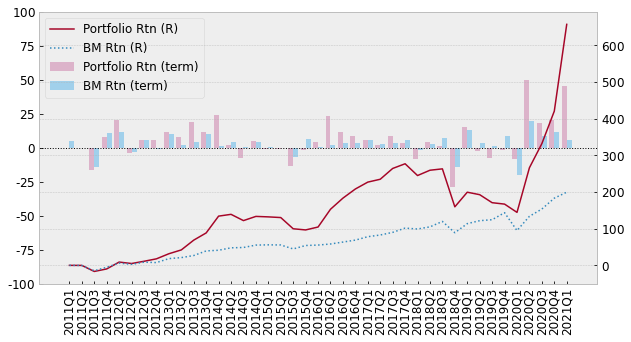

In [29]:
# Low F-Score
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}

for t in terms:
  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s2[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
  s3[t] = fs.fn_filter(data[t], by='F_Score', floor=0, cap=3, asc=False)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t]).sample(frac=1)[:30]
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [30]:
data = fs.fn_consolidated(otp='16491455081001081001', term='2020Q4')
data['avg_volume'] # 평균 거래량

2020Q4...OK


symbol
A        1583030
AA       4514200
AADI      100513
AAIC      195900
AAL     54210000
          ...   
ZUO      1440630
ZVO       527933
ZWS       703667
ZYME      321367
ZYXI      825697
Name: avg_volume, Length: 3230, dtype: int64

In [31]:
# 유동성을 강하게 고려
data = fs.fn_consolidated(otp='16491455081001081001', term='2020Q4', vol=1000000)
data['avg_volume']

2020Q4...OK


symbol
A         1583030
AA        4514200
AAL      54210000
AAPL    186217000
ABB       1482000
          ...    
ZS        3182870
ZSAN      4593800
ZTO       3821430
ZTS       1792600
ZUO       1440630
Name: avg_volume, Length: 1274, dtype: int64

In [32]:
# finterstellar
# Set test terms by fiscal years
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16491455081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [42]:
# 지금까지 공부한 팩터 계산
for t in terms:
  # Set previous terms
  prev_t = fs.quarters_before(terms, t, 4)

  # Company size
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 시가총액
  
  # Value
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # 주가수익비율
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # 주가순자산비율
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # 주가매출비율
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']) # 주가현금흐름비율

  # Profitability
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2 # 평균 자산
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2 # 평균 자본
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets'] # 자산대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'ROA'] = float('nan')
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity'] # 자본대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # 자산대비 영업효율
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity'] # 자본대비 영업효율

  # Stabiltiy
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity'] # 부채비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity'] # 차입금비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Debt/Equity'] = float('nan')
  data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities'] # 현재 부채 대비 자산
  data[t]['Shares Increase'] = data[t]['Shares'] / data[prev_t]['Shares'] # 주식수 증가율

  # Efficiency
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] # 매출 총이익률
  data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets'] # 총자산 회전율
  data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity'] # 총자본 회전율

  # Momentum
  data[t]['Price Growth'] = data[t]['Price_M3'] / data[prev_t]['Price_M3'] # 주가 성장률

In [43]:
# GP/E + 소형주 + 증자X + 중유동주
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}

for t in terms:
  s1[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)
  s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s3[t] = fs.fn_filter(data[t], by='Shares Increase', floor=.9, cap=1)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 12.84%
Accumulated return: 235.11%
Investment period: 10.0yrs
Sharpe ratio: 1.30
MDD: -29.72%


In [46]:
# finterstellar
# Set test terms by fiscal years
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16492521991001081001', term=t, vol=1000000) # 100만 주 기준으로 백테스팅

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [47]:
# 지금까지 공부한 팩터 계산
for t in terms:
  # Set previous terms
  prev_t = fs.quarters_before(terms, t, 4)

  # Company size
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 시가총액
  
  # Value
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # 주가수익비율
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # 주가순자산비율
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # 주가매출비율
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']) # 주가현금흐름비율

  # Profitability
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2 # 평균 자산
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2 # 평균 자본
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets'] # 자산대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'ROA'] = float('nan')
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity'] # 자본대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # 자산대비 영업효율
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity'] # 자본대비 영업효율

  # Stabiltiy
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity'] # 부채비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity'] # 차입금비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Debt/Equity'] = float('nan')
  data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities'] # 현재 부채 대비 자산
  data[t]['Shares Increase'] = data[t]['Shares'] / data[prev_t]['Shares'] # 주식수 증가율

  # Efficiency
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] # 매출 총이익률
  data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets'] # 총자산 회전율
  data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity'] # 총자본 회전율

  # Momentum
  data[t]['Price Growth'] = data[t]['Price_M3'] / data[prev_t]['Price_M3'] # 주가 성장률

CAGR: 12.84%
Accumulated return: 235.11%
Investment period: 10.0yrs
Sharpe ratio: 1.30
MDD: -29.72%


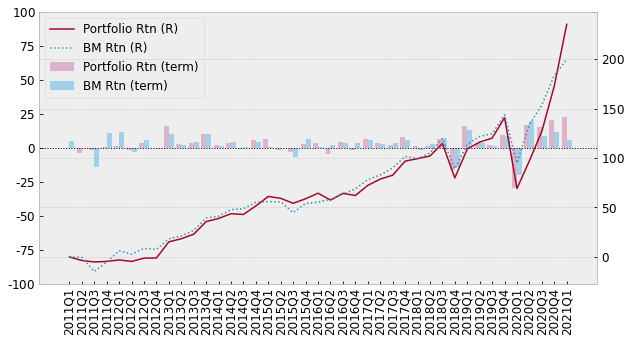

In [48]:
# GP/E + 소형주 + 증자X + 고유동주

s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}

for t in terms:
  s1[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)
  s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s3[t] = fs.fn_filter(data[t], by='Shares Increase', floor=.9, cap=1)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [49]:
# finterstellar
# Set test terms by fiscal years
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16492521991001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [50]:
# 지금까지 공부한 팩터 계산
for t in terms:
  # Set previous terms
  prev_t = fs.quarters_before(terms, t, 4)

  # Company size
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 시가총액
  
  # Value
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # 주가수익비율
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # 주가순자산비율
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # 주가매출비율
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']) # 주가현금흐름비율

  # Profitability
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2 # 평균 자산
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2 # 평균 자본
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets'] # 자산대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'ROA'] = float('nan')
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity'] # 자본대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # 자산대비 영업효율
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity'] # 자본대비 영업효율

  # Stabiltiy
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity'] # 부채비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity'] # 차입금비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Debt/Equity'] = float('nan')
  data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities'] # 현재 부채 대비 자산
  data[t]['Shares Increase'] = data[t]['Shares'] / data[prev_t]['Shares'] # 주식수 증가율

  # Efficiency
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] # 매출 총이익률
  data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets'] # 총자산 회전율
  data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity'] # 총자본 회전율

  # Momentum
  data[t]['Price Growth'] = data[t]['Price_M3'] / data[prev_t]['Price_M3'] # 주가 성장률

CAGR: 9.78%
Accumulated return: 154.31%
Investment period: 10.0yrs
Sharpe ratio: 0.75
MDD: -32.57%


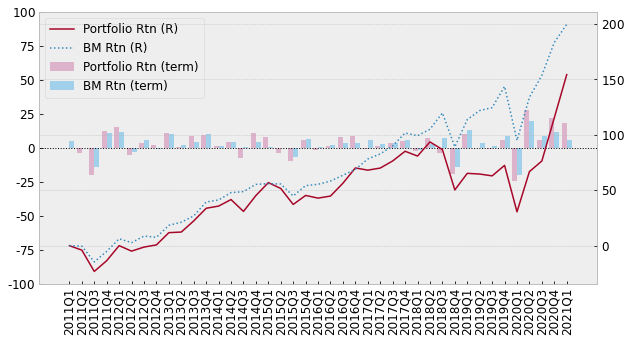

In [51]:
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s = {}
signal = {}

for t in terms:
  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
  s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=1, asc=True)
  s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=1, asc=True)
  s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=1, asc=True)
  s5[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s6[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t])
  s[t] = fs.combine_signal(s6[t], s5[t], how='and', n=50)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 7.93%
Accumulated return: 114.70%
Investment period: 10.0yrs
Sharpe ratio: 0.50
MDD: -40.11%


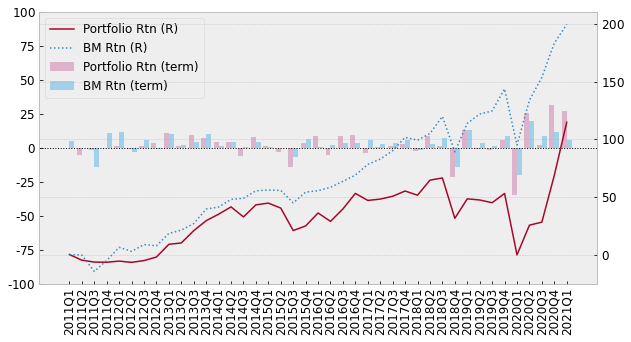

In [52]:
# (4대장 + GP/A + 부채비율 + 유동비율) + 소형주 * 증자X
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s7 = {}
s8 = {}
s9 = {}
s10 = {}
s11 = {}
s = {}
signal = {}

for t in terms:
  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
  s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=1, asc=True)
  s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=1, asc=True)
  s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=1, asc=True)
  s5[t] = fs.fn_score(data[t], by='ROE', method='relative', floor=1, asc=False)
  s6[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=1, asc=False)
  s7[t] = fs.fn_score(data[t], by='Debt/Equity', method='relative', floor=0, asc=True)
  s8[t] = fs.fn_score(data[t], by='Current Ratio', method='relative', floor=0, asc=False)
  s9[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s10[t] = fs.fn_filter(data[t], by='Shares Increase', floor=.9, cap=1)
  s11[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t], s5[t], s6[t], s7[t], s8[t])
  s[t] = fs.combine_signal(s11[t], s9[t], s10[t], how='and', n=50)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 7.27%
Accumulated return: 101.91%
Investment period: 10.0yrs
Sharpe ratio: 0.58
MDD: -39.70%


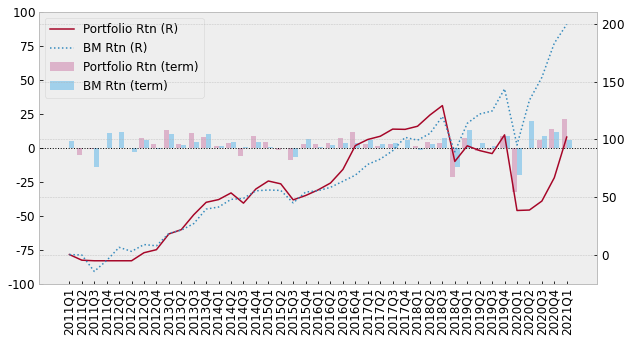

In [53]:
# (4대장 + GP/A + 부채비율 + 유동비율) + 소형주 * 증자X
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s7 = {}
s8 = {}
s9 = {}
s10 = {}
s11 = {}
s12 = {}
s = {}
signal = {}

for t in terms:
  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
  s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=1, asc=True)
  s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=1, asc=True)
  s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=1, asc=True)
  s5[t] = fs.fn_score(data[t], by='ROE', method='relative', floor=1, asc=False)
  s6[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=1, asc=False)
  s7[t] = fs.fn_score(data[t], by='Debt/Equity', method='relative', floor=0, asc=True)
  s8[t] = fs.fn_score(data[t], by='Current Ratio', method='relative', floor=0, asc=False)
  s9[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s10[t] = fs.fn_filter(data[t], by='Shares Increase', floor=.9, cap=1)
  s11[t] = fs.fn_filter(data[t], by='Price Growth', floor=1)
  s12[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t], s5[t], s6[t], s7[t], s8[t])
  s[t] = fs.combine_signal(s12[t], s9[t], s10[t], s11[t], how='and', n=50)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 10.07%
Accumulated return: 161.12%
Investment period: 10.0yrs
Sharpe ratio: 0.62
MDD: -49.04%


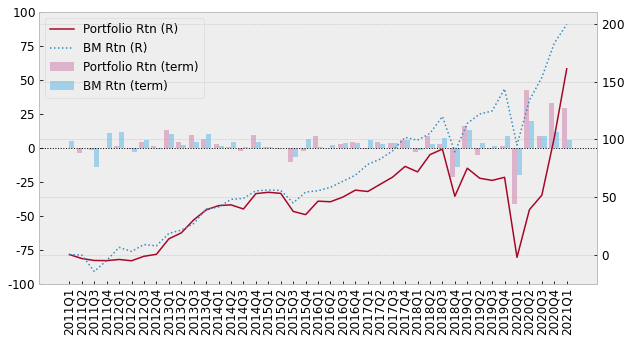

In [54]:
# GP/A + 소형주 + 증자X
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}

for t in terms:
  s1[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s3[t] = fs.fn_filter(data[t], by='Shares Increase', floor=.9, cap=1)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=50)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 16.40%
Accumulated return: 357.00%
Investment period: 10.0yrs
Sharpe ratio: 1.20
MDD: -38.02%


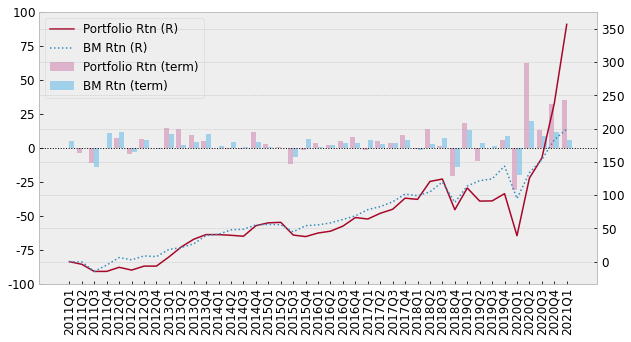

In [55]:
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s = {}
signal = {}

for t in terms:
  s1[t] = fs.fn_score(data[t], by='Asset Turnover', method='relative', floor=0, asc=False)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s3[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s4[t] = fs.combine_score(s1[t], s2[t])
  s[t] = fs.combine_signal(s4[t], s3[t], how='and', n=50)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)